
## 🧩 Task 1 – Predict the Statevector after Hadamard on |0>, |1>, |+>, and |->

**Objective:**  
Apply the Hadamard gate on four basic single-qubit states and analyze how the statevector changes.

We will observe the resulting **statevector**, **Bloch sphere**, and **measurement histogram** for each case.


In [12]:
# ==============================
# Imports
# ==============================
!pip install qiskit qiskit-aer matplotlib
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np


In [13]:

# ==============================
# Helper Function: visualize_hadamard()
# ==============================
# This function applies a Hadamard gate on a single-qubit state
# and shows its resulting Bloch sphere, state city, and histogram.

def visualize_hadamard(initial_state, label):
    qc = QuantumCircuit(1, 1)       # Create 1-qubit, 1-classical-bit circuit
    qc.initialize(initial_state, 0) # Initialize input state
    qc.h(0)                         # Apply Hadamard
    qc.measure(0, 0)                # Measure result

    # Create circuit for statevector visualization (no measurement)
    qc_state = QuantumCircuit(1)
    qc_state.initialize(initial_state, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("Statevector after H:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Measurement Simulation
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")


--- |0> ---
Statevector after H: [0.70710678+0.j 0.70710678+0.j]


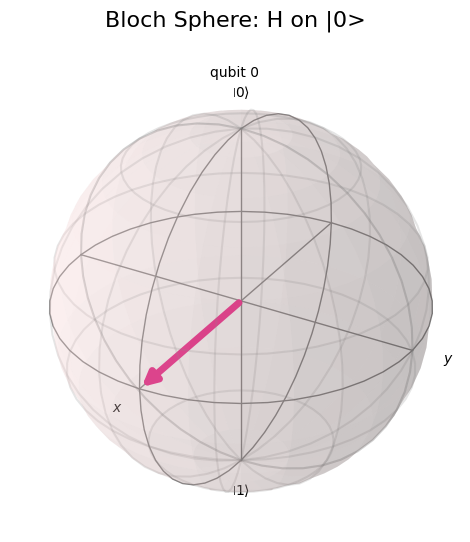

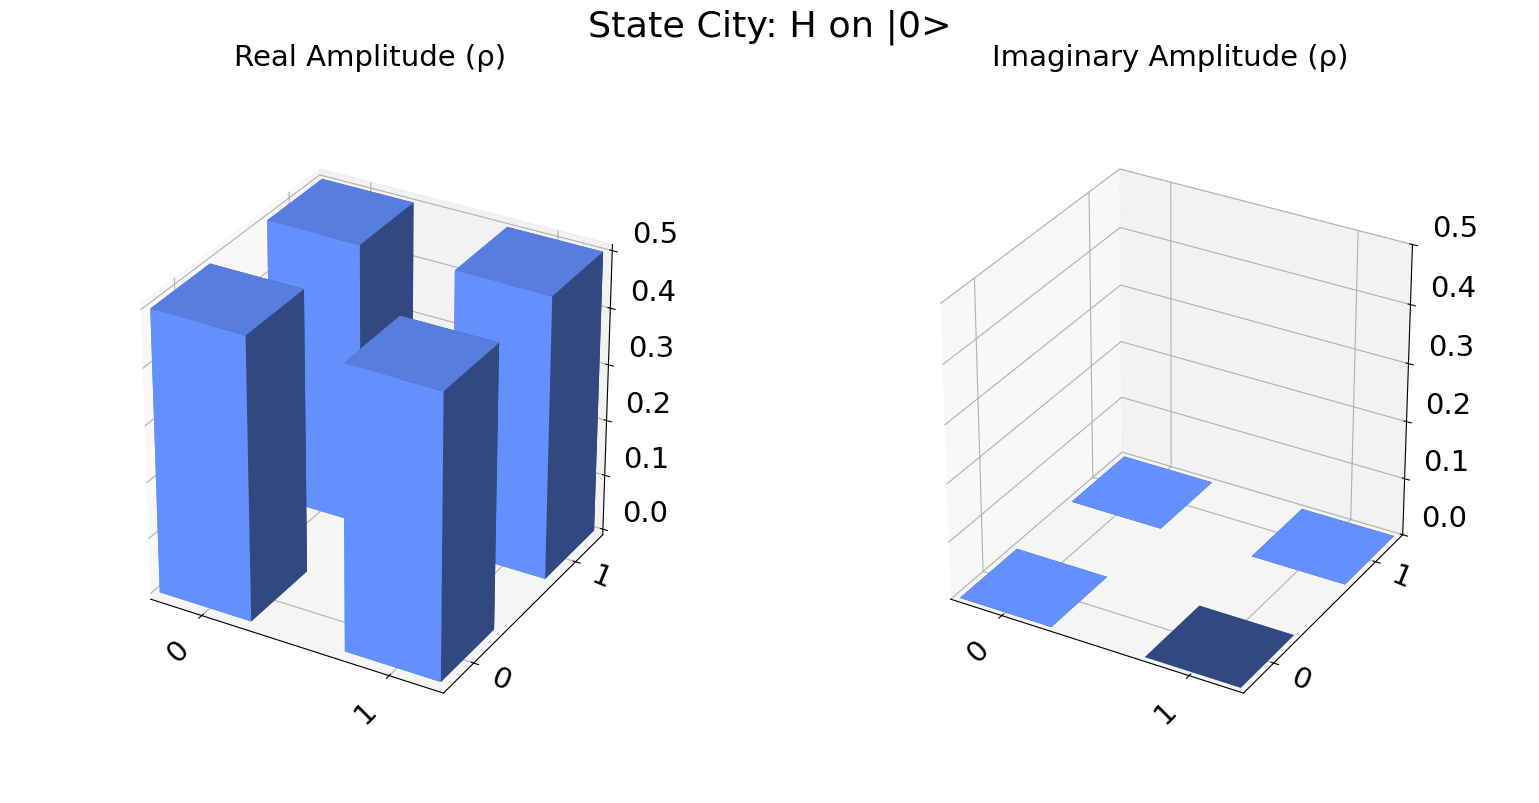

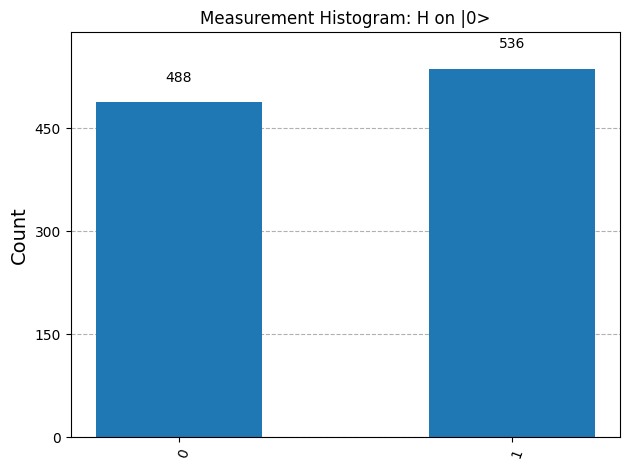



--- |1> ---
Statevector after H: [ 0.70710678+0.j -0.70710678+0.j]


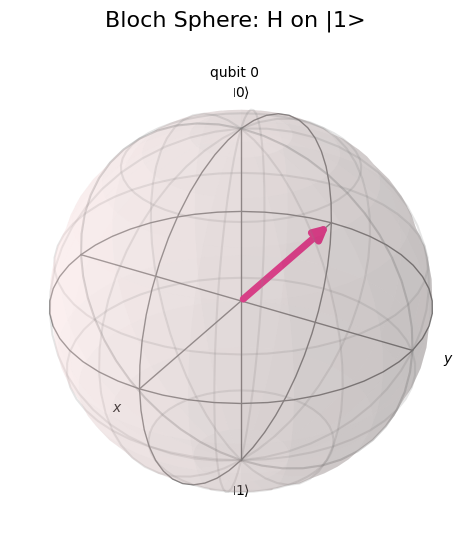

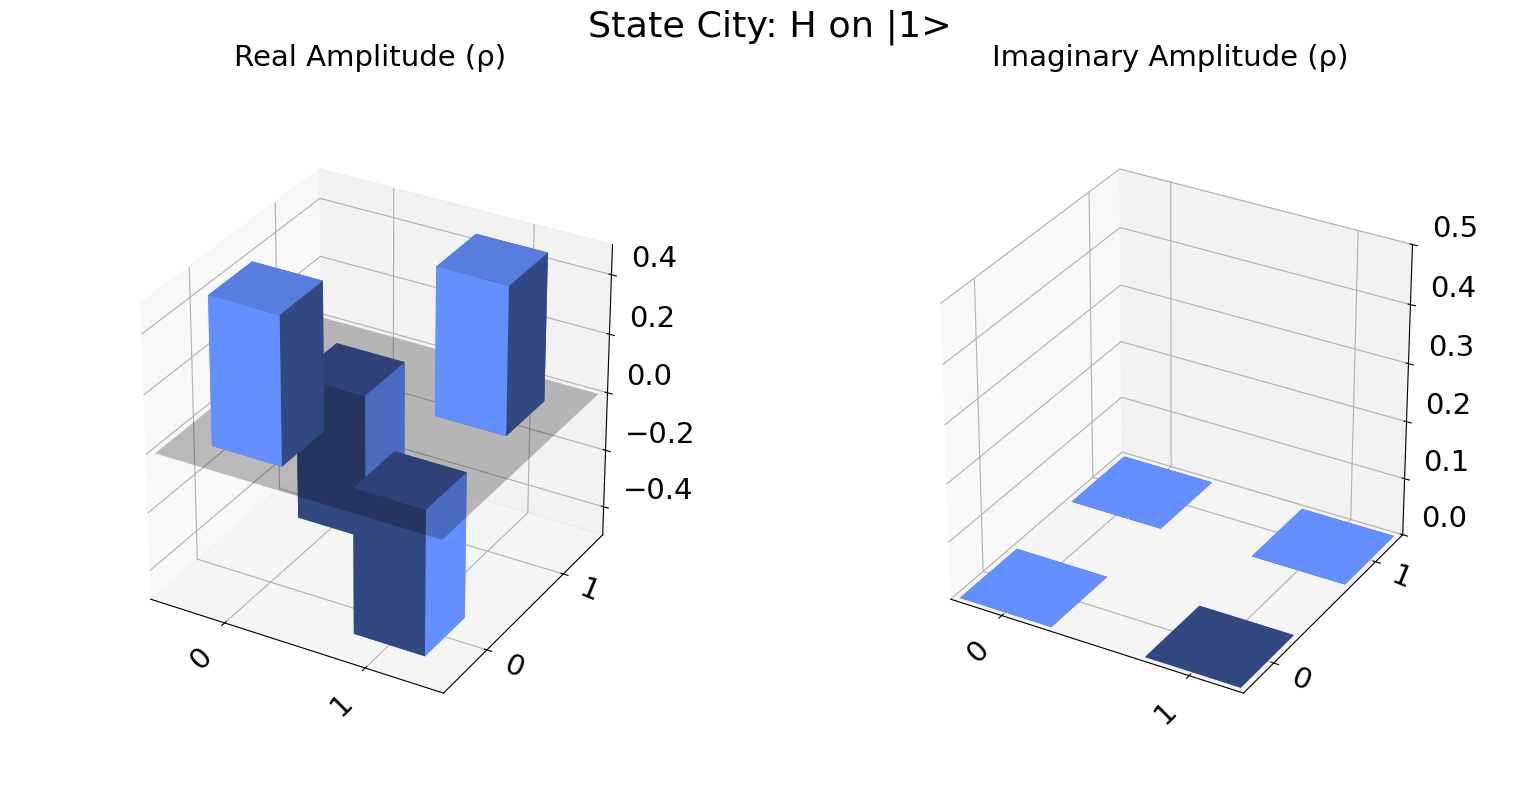

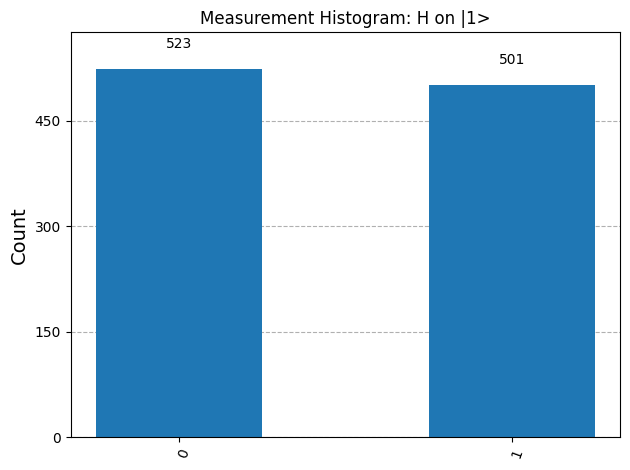



--- |+> ---
Statevector after H: [1.+0.j 0.+0.j]


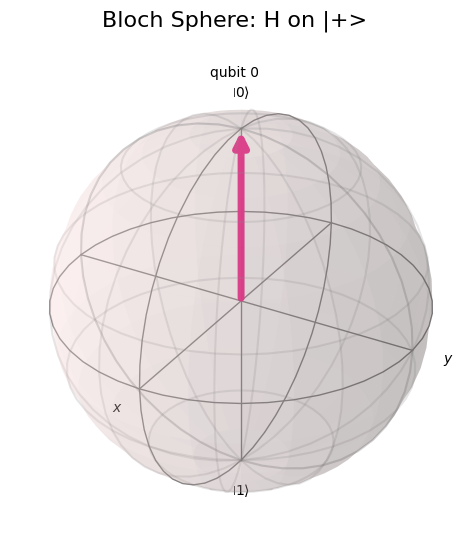

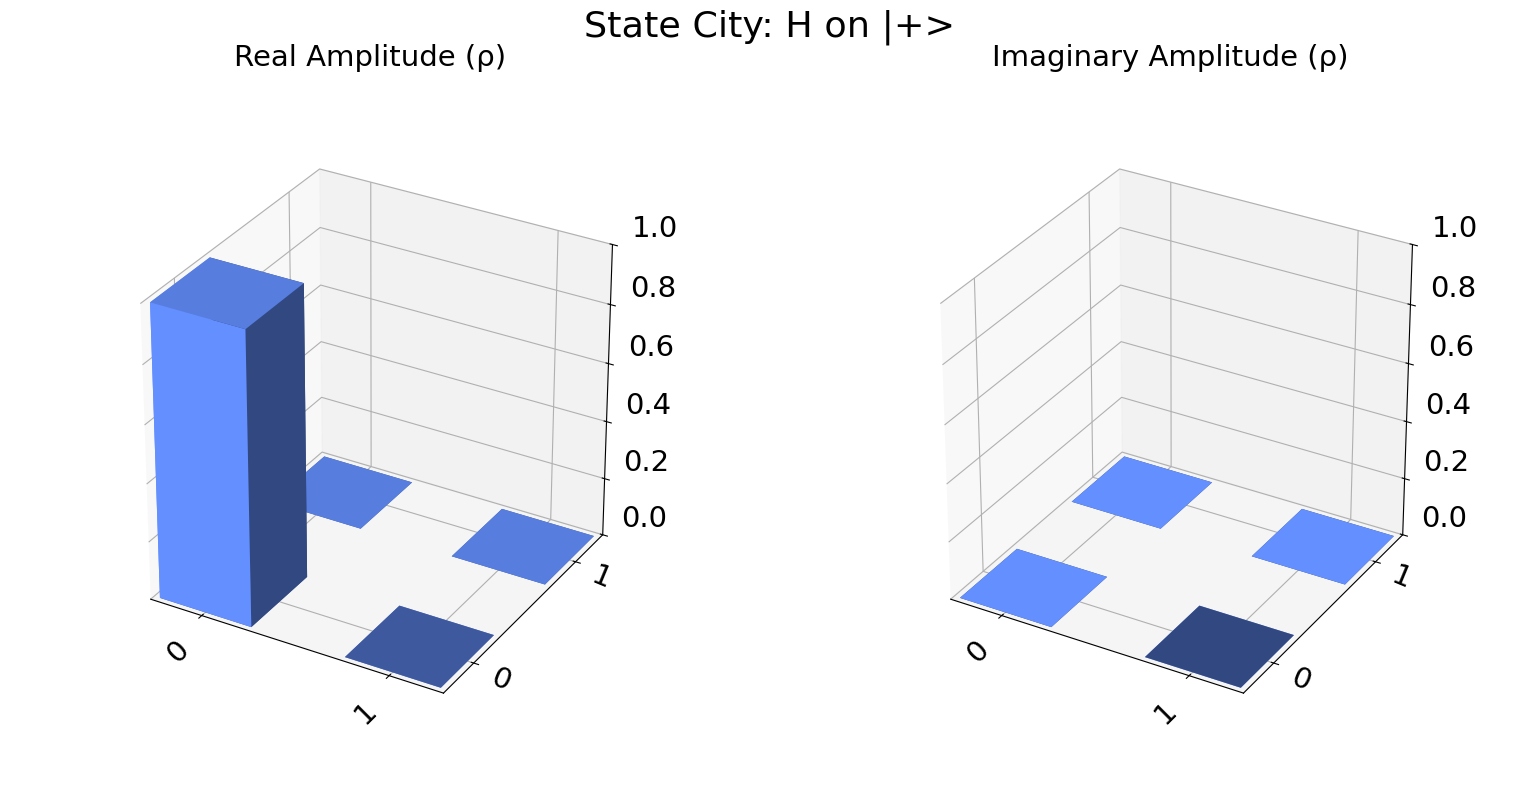

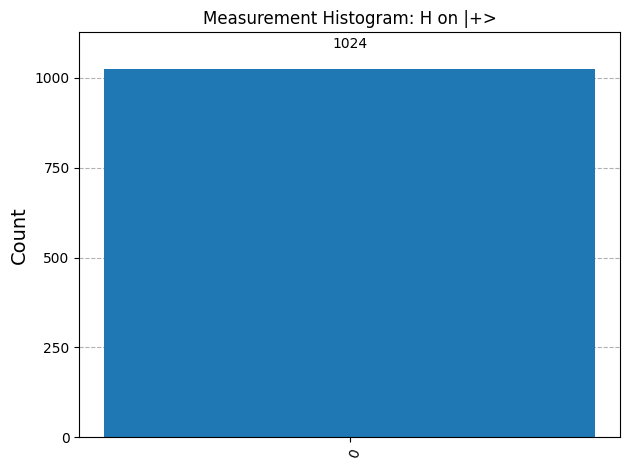



--- |-> ---
Statevector after H: [0.+0.j 1.+0.j]


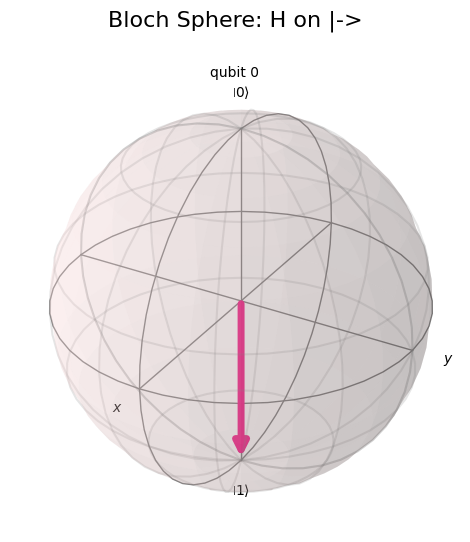

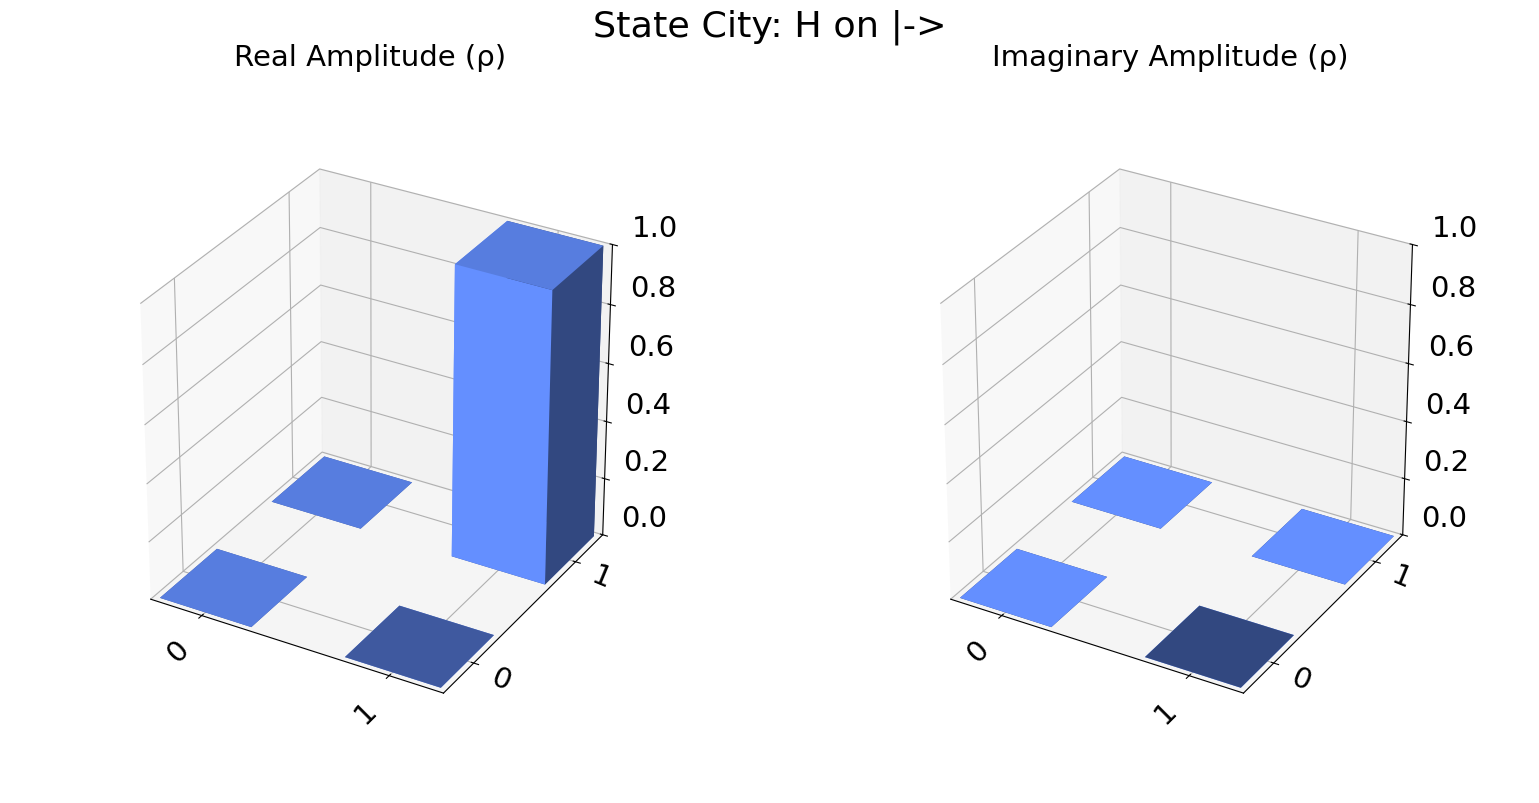

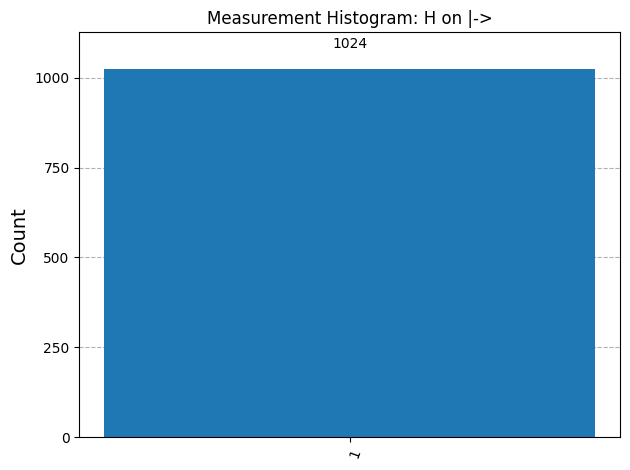

In [14]:

# ==============================
# Execute Hadamard on different states
# ==============================

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")



**Observation:**  
- H|0⟩ → |+⟩ (superposition of 0 and 1)  
- H|1⟩ → |−⟩  
- H|+⟩ → |0⟩ (returns to basis)  
- H|−⟩ → |1⟩  
Thus, Hadamard interchanges the computational and diagonal bases.



## 🧩 Task 2 – Three-Qubit System: H⊗H⊗H

**Objective:**  
Apply Hadamard on each of three qubits initialized to |000⟩ and analyze the measurement probabilities.


Statevector: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


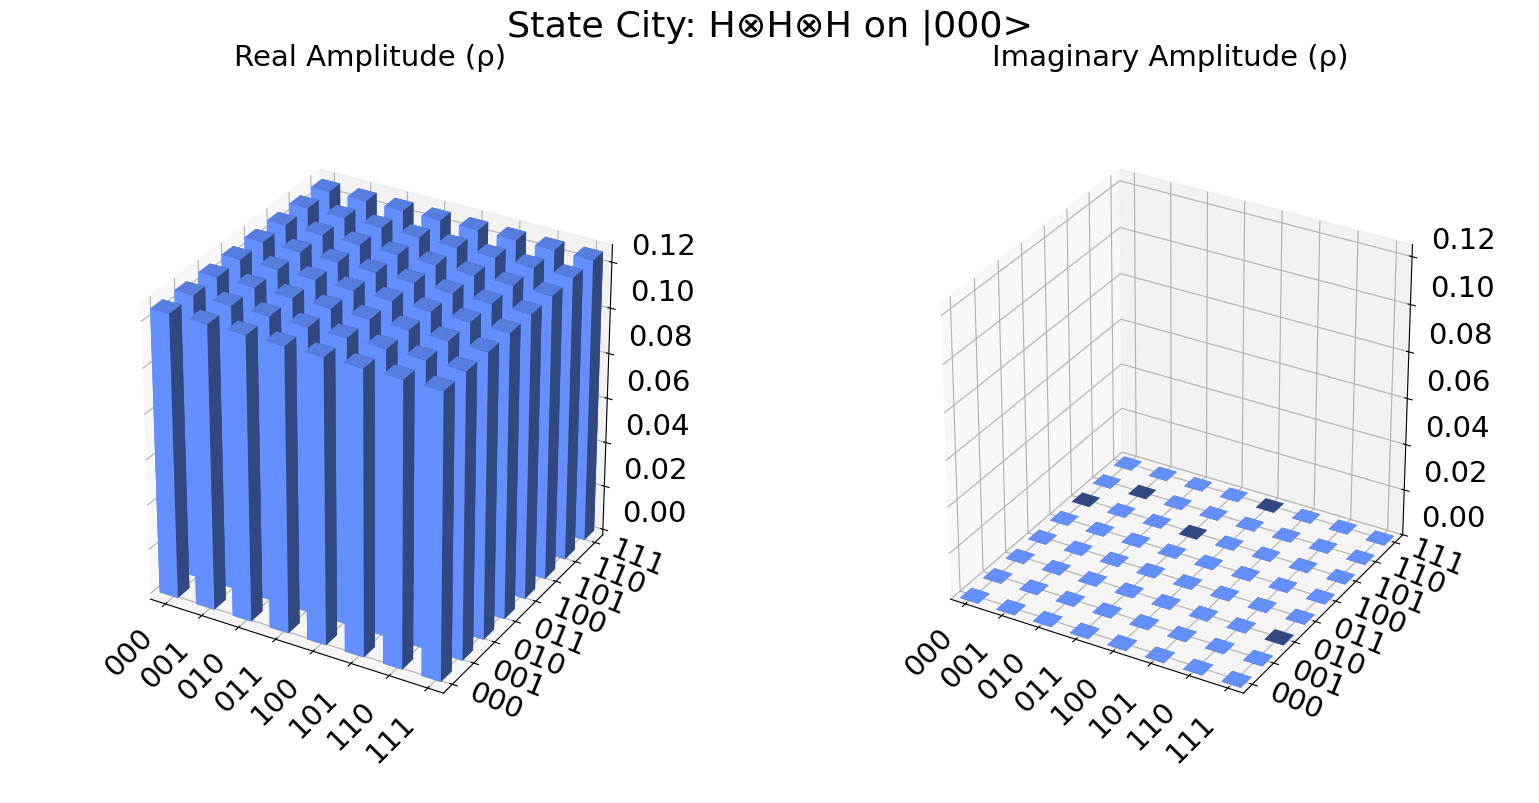

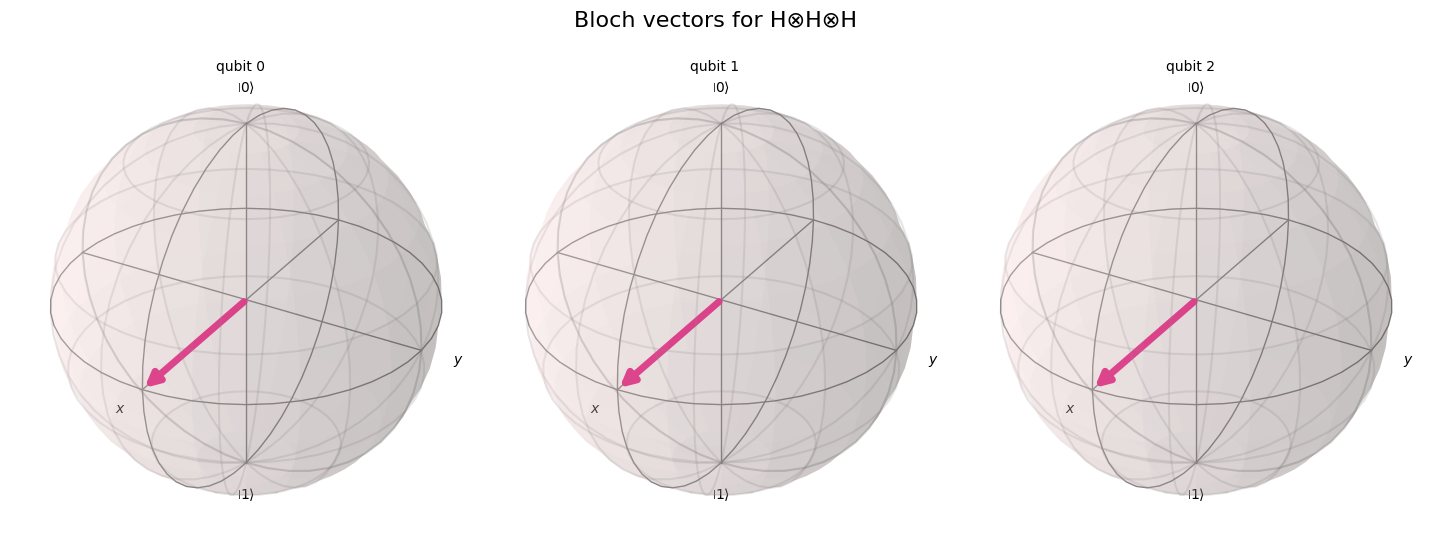

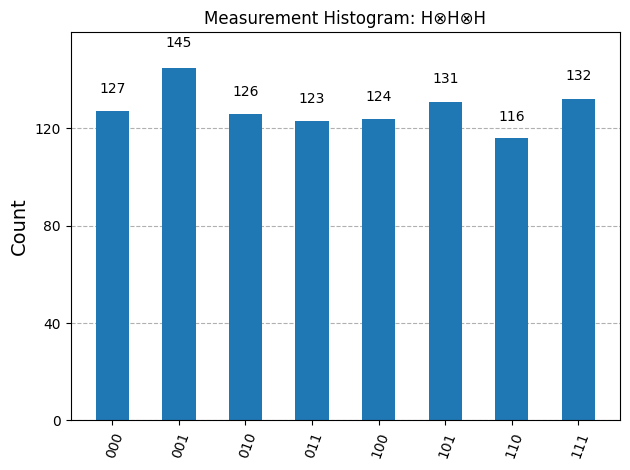


All 8 outcomes have nearly equal probability.



In [15]:

# Create a 3-qubit circuit and apply Hadamard to all
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

# State before measurement
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("Statevector:", state3.data)

display(plot_state_city(state3, title="State City: H⊗H⊗H on |000>"))
display(plot_bloch_multivector(state3, title="Bloch vectors for H⊗H⊗H"))

# Run simulation
sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H"))

print("\nAll 8 outcomes have nearly equal probability.\n")



**Observation:**  
Applying Hadamard on all three qubits creates a uniform superposition of 8 possible states — all have equal probability of 1/8.



## 🧩 Task 3 – Apply H + CX + CX on 3 Qubits

**Objective:**  
Apply a Hadamard gate on the first qubit followed by two CNOTs to create correlations among all qubits.


Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


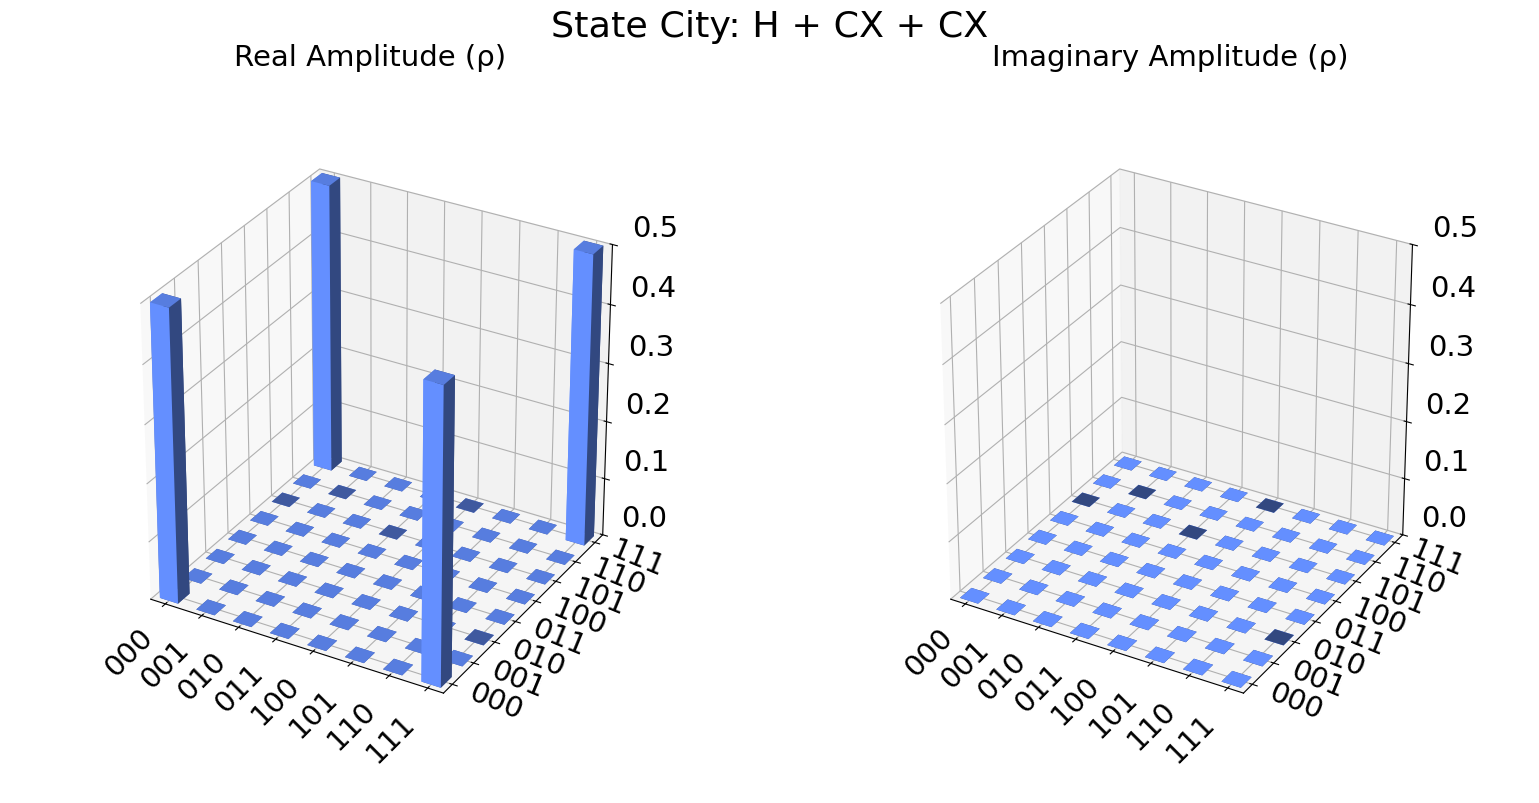

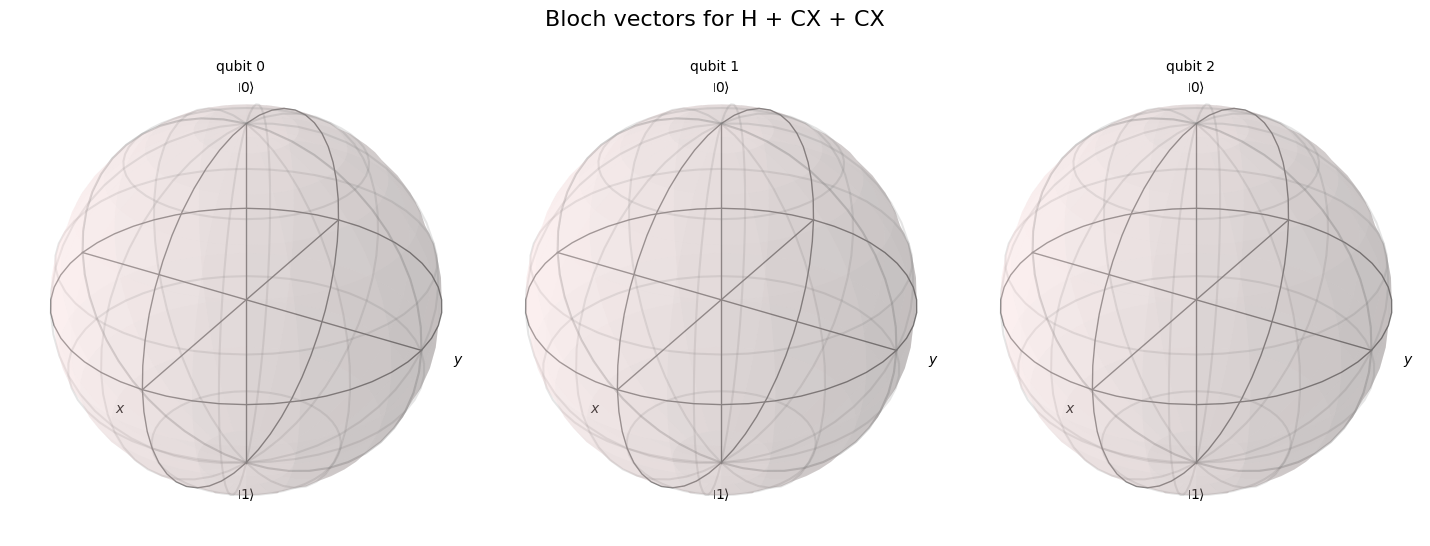

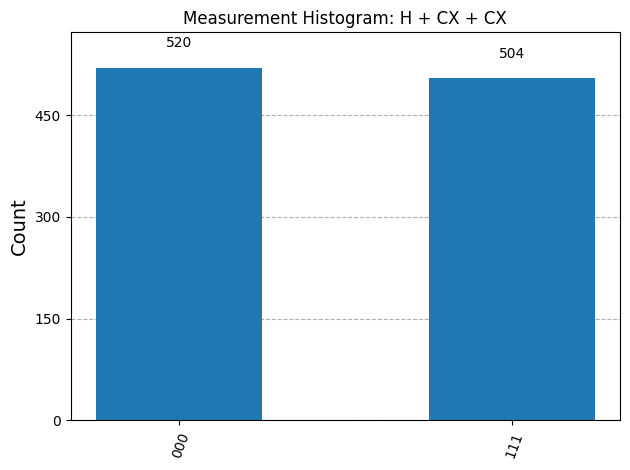


Expected correlated outcomes: |000> and |111>.



In [16]:

# Create circuit: H + CX + CX
qc_corr = QuantumCircuit(3, 3)
qc_corr.h(0)
qc_corr.cx(0, 1)
qc_corr.cx(0, 2)
qc_corr.measure([0, 1, 2], [0, 1, 2])

# Get statevector before measurement
qc_corr_state = QuantumCircuit(3)
qc_corr_state.h(0)
qc_corr_state.cx(0, 1)
qc_corr_state.cx(0, 2)
state_corr = Statevector.from_instruction(qc_corr_state)

print("Statevector:", state_corr.data)

display(plot_state_city(state_corr, title="State City: H + CX + CX"))
display(plot_bloch_multivector(state_corr, title="Bloch vectors for H + CX + CX"))

# Simulation
qc_corr_t = transpile(qc_corr, sim)
result_corr = sim.run(qc_corr_t, shots=1024).result()
counts_corr = result_corr.get_counts()
display(plot_histogram(counts_corr, title="Measurement Histogram: H + CX + CX"))
print("\nExpected correlated outcomes: |000> and |111>.\n")



**Observation:**  
Only |000⟩ and |111⟩ outcomes occur with equal probability.  
All qubits are perfectly correlated — this is a **GHZ (Greenberger–Horne–Zeilinger) state**.



## 🧩 Task 4 – Apply H Twice on |1>

**Objective:**  
Verify that applying the Hadamard gate twice restores the original |1⟩ state.


Statevector after H twice: [0.+0.j 1.+0.j]


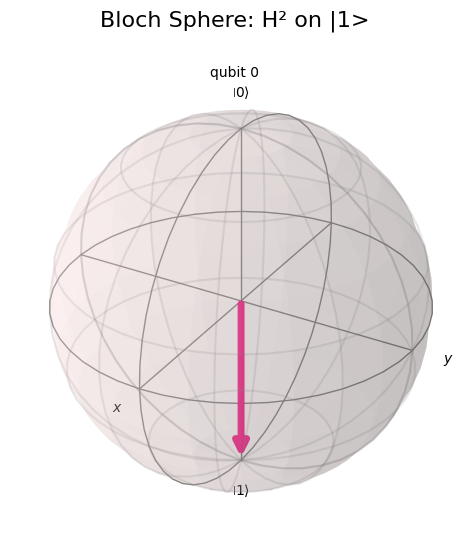

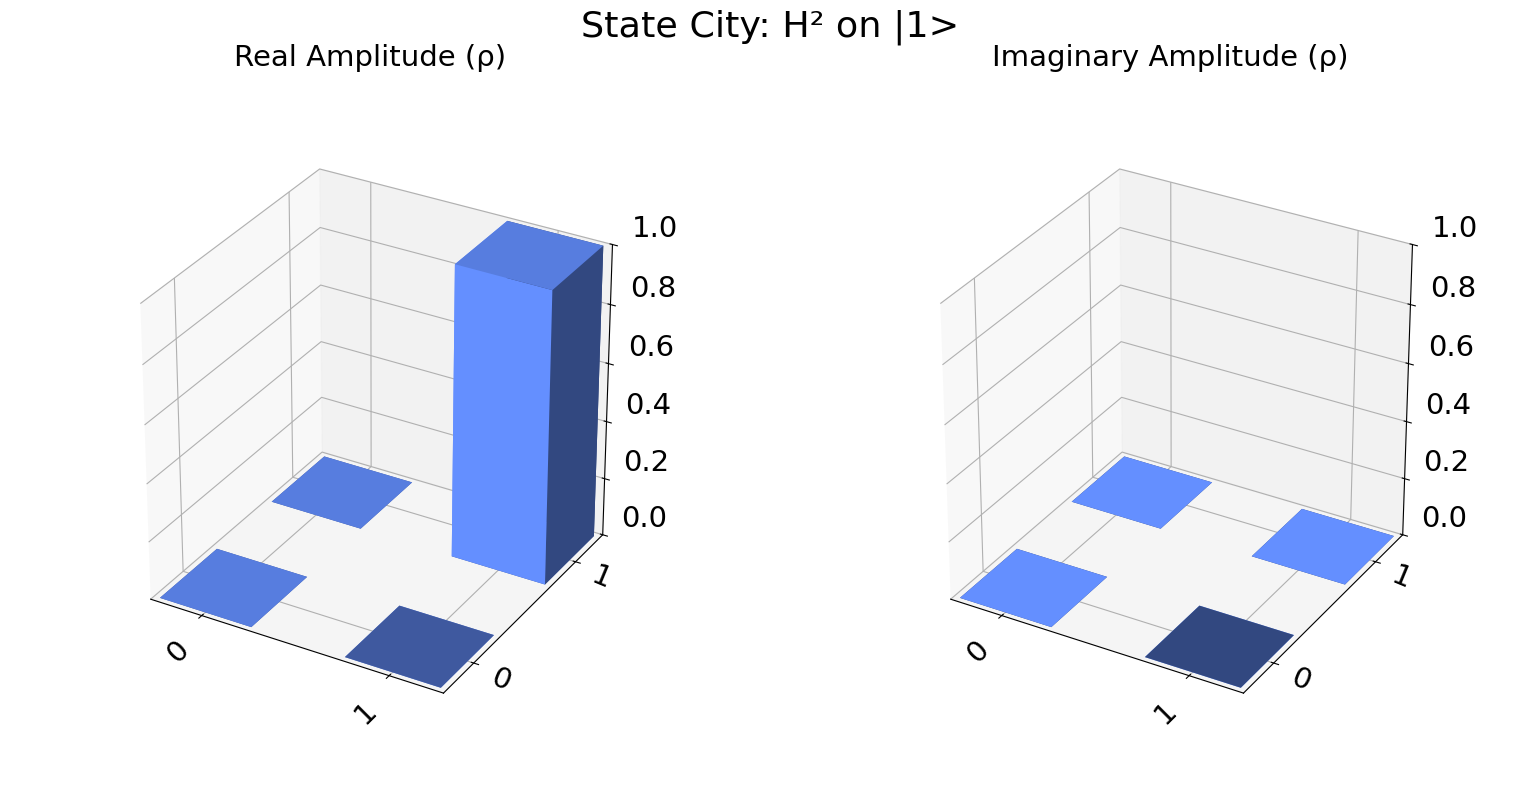

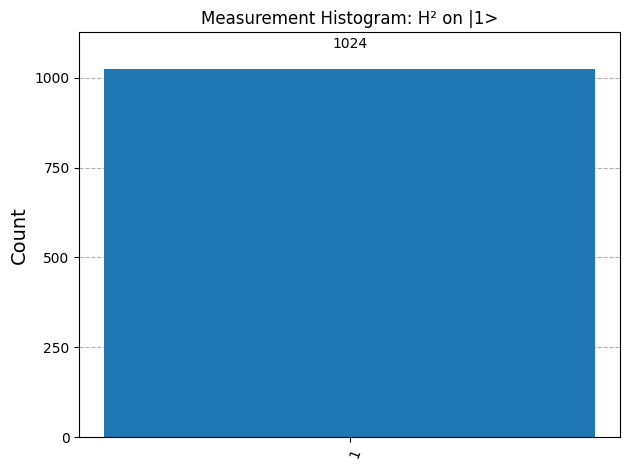


Hadamard squared = Identity operation, original state |1> is restored.



In [17]:

# Create a circuit: H twice on |1>
qc_double = QuantumCircuit(1, 1)
qc_double.initialize([0, 1], 0)
qc_double.h(0)
qc_double.h(0)
qc_double.measure(0, 0)

# Get final statevector
qc_double_state = QuantumCircuit(1)
qc_double_state.initialize([0, 1], 0)
qc_double_state.h(0)
qc_double_state.h(0)
state_double = Statevector.from_instruction(qc_double_state)

print("Statevector after H twice:", state_double.data)

# Visualization
display(plot_bloch_multivector(state_double, title="Bloch Sphere: H² on |1>"))
display(plot_state_city(state_double, title="State City: H² on |1>"))

# Simulation
qc_double_t = transpile(qc_double, sim)
result_double = sim.run(qc_double_t, shots=1024).result()
counts_double = result_double.get_counts()
display(plot_histogram(counts_double, title="Measurement Histogram: H² on |1>"))

print("\nHadamard squared = Identity operation, original state |1> is restored.\n")



**Observation:**  
Applying Hadamard twice brings the qubit back to its initial state (acts like an identity).  
Thus, **H² = I**.



## 🧩 Task 5 – Bloch Sphere Visualization of Hadamard Rotations

**Objective:**  
Observe how the Hadamard gate rotates the qubit on the Bloch sphere.


--- |0> ---
Statevector after H: [0.70710678+0.j 0.70710678+0.j]


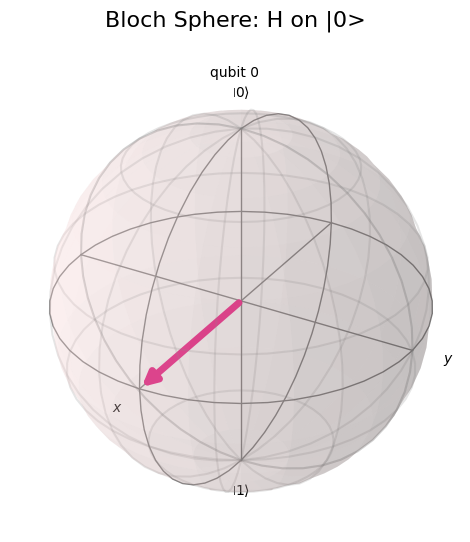

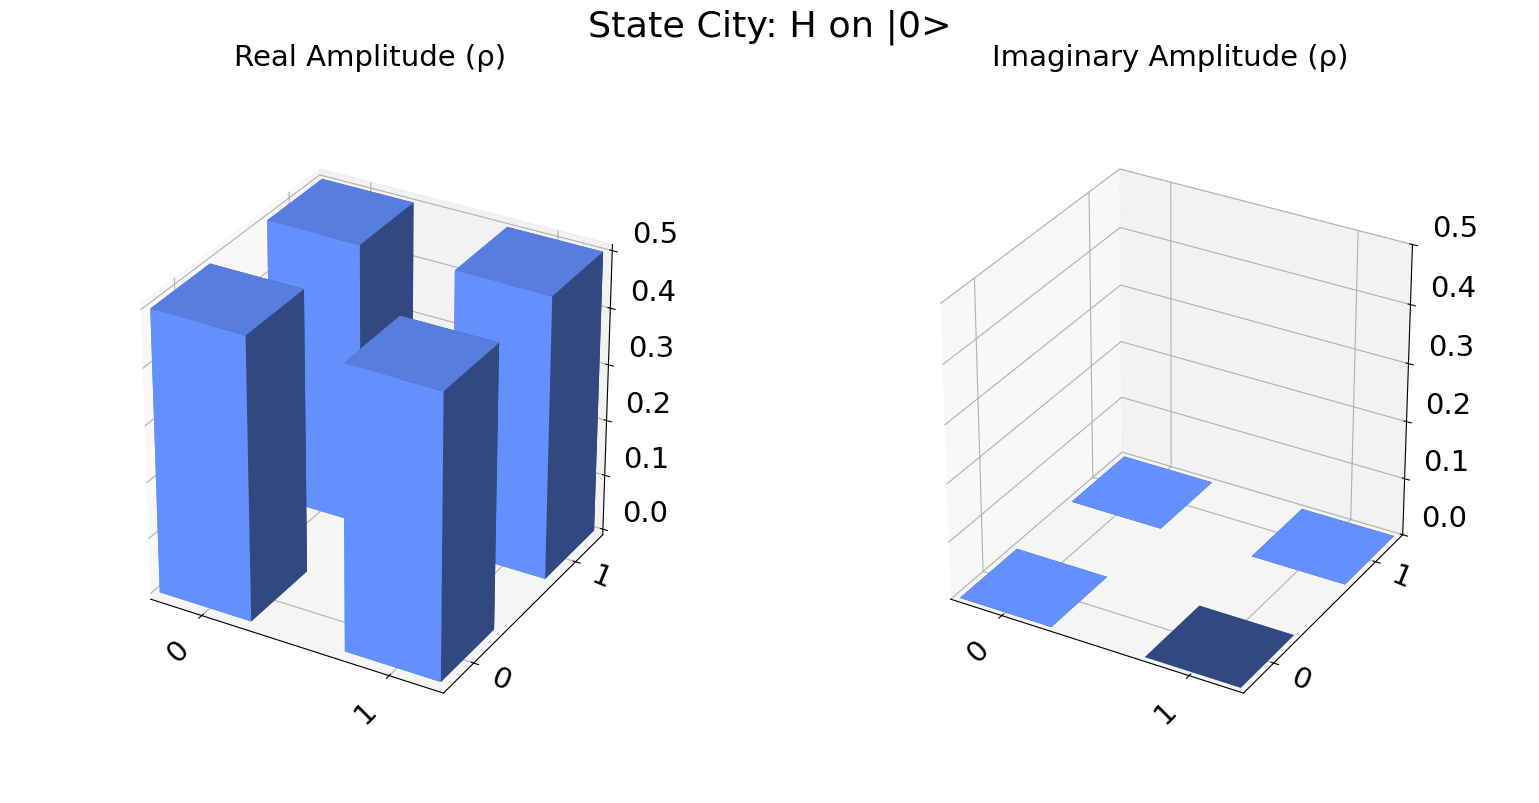

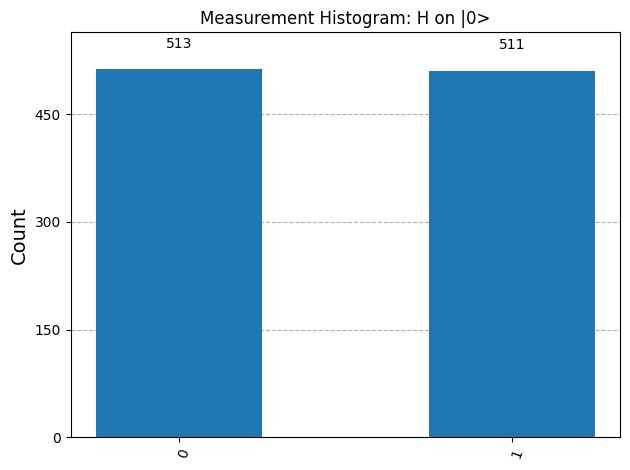

In [18]:
# Visualize qubit rotation from |0> to |+> using Bloch sphere

# Using the previously defined visualize_hadamard function
visualize_hadamard(np.array([1, 0]), "|0>")


**Observation:**  
The Bloch sphere shows that Hadamard rotates the qubit state from the **north pole (|0⟩)** to the **X-axis (|+⟩)** — a 90° rotation on the Bloch sphere.
